Copyright (c) 2020 Juergen Koefinger, Max Planck Institute of Biophysics, Frankfurt am Main, Germany

Released under the MIT Licence, see the file LICENSE.txt.

# Description

Helper tool to generate models for residuals using step functions. 

Models are generated with and without normally distributed noise. You can use these models to explore the statistical power using the IPhython notebooks hplusminus_tests.ipynp and hplusminus_statistical_power.ipynp.

## Intialization 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16)

## Define Model For Residuals Using Step Functions

In [2]:
# Number of data points
number_data_points = 500
# Define positions of steps in fractions of the number of data points. Fractions have to be in [0,1].
relative_step_postitions = [0, 0.25, 0.5, 0.75, 1]
# Define step heights 
step_heights = np.asarray([0, 1, 0, 1])
# Define a scale factor for the step heights. 
# Use the scale factor to tune the signal-to-noise ratio when normally distributed is added below. 
scale_factor = 1
# Scale step heights 
step_heights = step_heights*scale_factor

In [3]:
relative_step_postitions = np.sort(relative_step_postitions)
if np.any(relative_step_postitions<0)+np.any(relative_step_postitions>1):
    print("ERROR: Entries of \"fractions\" have to be in [0,1]")
if len(step_heights) != (len(relative_step_postitions)-1):
    print("ERROR: \"heigths\" has to have one more entry than \"fractions\"")

In [4]:
# Set is_true_model=True if you want to generate noise for the true model. That is, the model will equal to zero for all indices.
is_true_model=False

## Model Generation 

In [5]:
# Generate step function (i.e., the model) from the information entered above
step_positions=np.asarray(np.round(relative_step_postitions*number_data_points), dtype=np.int)
step_lengths=step_positions[1:]-step_positions[:-1]
model=[]
for i, l in enumerate(step_lengths):
    model.append(np.ones(l)*step_heights[i])
model=(np.asarray(model)).flatten()
model-=model.mean()

In [6]:
# Set is_true_model=True if you want to generate noise for the true model. That is, the model will equal to zero for all indices.
if is_true_model:
    model*=0.

In [7]:
# Add normally distributed noise to the model
model_normalized_residuals=model+np.random.normal(0, 1, number_data_points)

## Plotting

Text(0, 0.5, 'model')

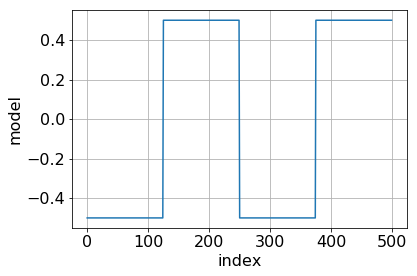

In [8]:
plt.plot(model)
plt.grid()
plt.xlabel("index")
plt.ylabel("model")

Text(0, 0.5, 'model with noise')

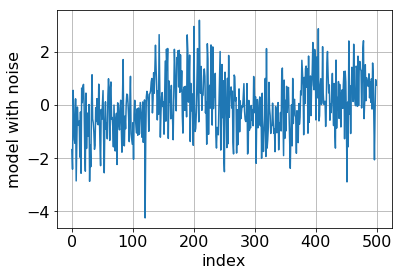

In [9]:
plt.plot(model_normalized_residuals)
plt.grid()
plt.xlabel("index")
plt.ylabel("model with noise")

## Save Model with and without noise to text files

In [10]:
io_path="./data/"

In [11]:
if is_true_model:
    pref="true_"
else:
    pref="alternative_"
# Without noise
np.savetxt(io_path+pref+"model.txt", model)
# With noise
np.savetxt(io_path+pref+"model_normalized_residuals.txt", model_normalized_residuals)